<a href="https://colab.research.google.com/github/DeisyData/BIT_IA_Bootcamp/blob/main/S7_C1_Balance_de_clases_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

In [ ]:
# 1. Generación de Datos Artificiales
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=2, weights=[0.9, 0.1])
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Class'] = y

In [ ]:
df['Class'].value_counts()

,count
Class,
0,445
1,55


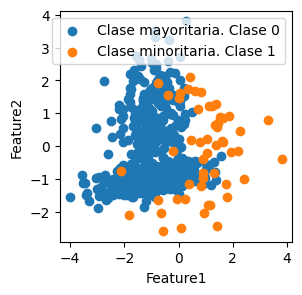

In [ ]:
# Scatter es un grafico de disttribucion de puntos scatter(x,y)
plt.figure(figsize=(3,3))
plt.scatter(df[df['Class'] == 0]['Feature1'], df[df['Class'] == 0]['Feature2'], label = 'Clase mayoritaria. Clase 0')
plt.scatter(df[df['Class'] == 1]['Feature1'], df[df['Class'] == 1]['Feature2'], label = 'Clase minoritaria. Clase 1')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

[LIbraría para desbalance de clases](https://imbalanced-learn.org/stable/over_sampling.html)

# Parte 2. Oversampling: SMOTE

In [ ]:
smote = SMOTE(sampling_strategy=0.67, random_state= 42)
X_m, y_m = smote.fit_resample(X,y)

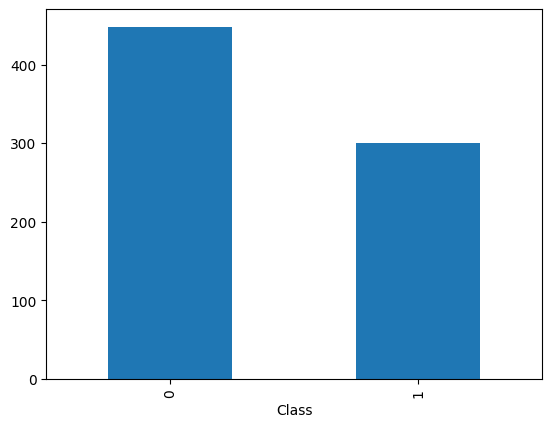

In [ ]:
df_m = pd.DataFrame(X_m, columns=['Feature1', 'Feature2'])
df_m['Class'] = y_m
df_m['Class'].value_counts().plot(kind='bar')
df_om = df_m

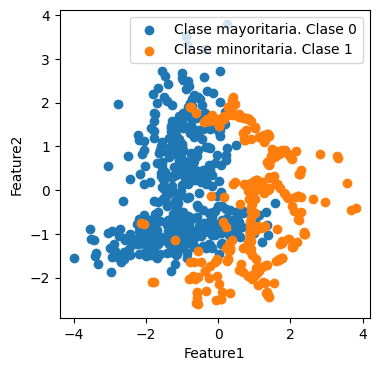

In [ ]:
df_graf = df_m

# Scatter es un grafico de disttribucion de puntos scatter(x,y)
plt.figure(figsize=(4,4))
plt.scatter(df_graf[df_graf['Class'] == 0]['Feature1'], df_graf[df_graf['Class'] == 0]['Feature2'], label = 'Clase mayoritaria. Clase 0')
plt.scatter(df_graf[df_graf['Class'] == 1]['Feature1'], df_graf[df_graf['Class'] == 1]['Feature2'], label = 'Clase minoritaria. Clase 1')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

# Parte 3. Undersampling: RandomUnderSampler

In [ ]:
underSampler = RandomUnderSampler(sampling_strategy=0.67, random_state= 42)
X_um, y_um = underSampler.fit_resample(X,y)

<Axes: xlabel='Class'>

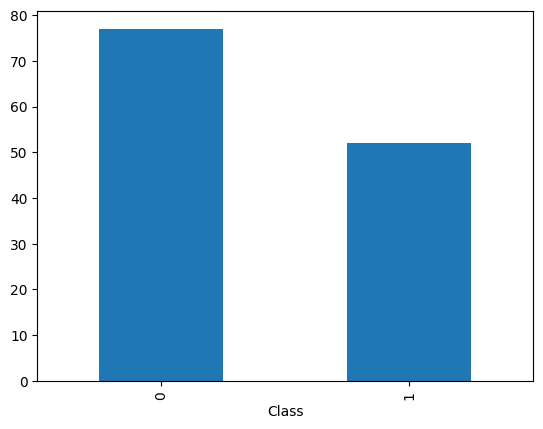

In [ ]:
df_um = pd.DataFrame(X_um, columns=['Feature1', 'Feature2'])
df_um['Class'] = y_um
df_um['Class'].value_counts().plot(kind='bar')

In [ ]:
df_um['Class'].value_counts()

,count
Class,
0,82
1,55


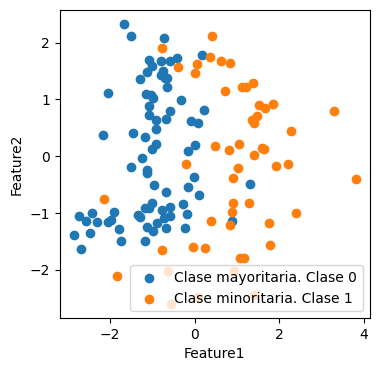

In [ ]:
df_graf = df_um

# Scatter es un grafico de disttribucion de puntos scatter(x,y)
plt.figure(figsize=(4,4))
plt.scatter(df_graf[df_graf['Class'] == 0]['Feature1'], df_graf[df_graf['Class'] == 0]['Feature2'], label = 'Clase mayoritaria. Clase 0')
plt.scatter(df_graf[df_graf['Class'] == 1]['Feature1'], df_graf[df_graf['Class'] == 1]['Feature2'], label = 'Clase minoritaria. Clase 1')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

# Parte 4. Entrenar clasificadores
* Raw Data         := df (X, y)
* Oversamplig Data := df_m (X_m, y_m)
* Undsersampling Data:= df_um (X_um, y_um)

Modelos
1. Árbol de decisión    := model_tree
2. Regresión logísticas := model_RegLog
3. A elección

Métricas

* Accuracy
* Precision
* Recall
* F1 Score
* Confusion Matrix
* AUC



## 4.1 Split: train-test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_om, X_test_om, y_train_om, y_test_om = train_test_split(X_m, y_m, test_size=0.2, random_state=42)
X_train_um, X_test_um, y_train_um, y_test_um = train_test_split(X_um, y_um, test_size=0.2, random_state=42)

## 4.2. Definir, entrenar y predecir de los modelos

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

In [ ]:
# 4.2.1 model_tree

In [ ]:
model_tree = DecisionTreeClassifier()

In [ ]:
tree_raw = model_tree.fit(X_train, y_train)
tree_om = model_tree.fit(X_train_om, y_train_om)
tree_um = model_tree.fit(X_train_um, y_train_um)

In [ ]:
y_predict_raw = tree_raw.predict(X_test)
y_predict_om = tree_om.predict(X_test_om)
y_predict_um = tree_um.predict(X_test_um)

## 4.3. Medición de desempeño del modelo
Con variación del tamalo del dataset y con técnicas de balance clases

In [ ]:
def metricas(modelo, y_test, y_predict):
  print(f'Metricas del modelo {modelo}')
  print("Accuracy:", accuracy_score(y_test, y_predict))
  print("Precision:", precision_score(y_test, y_predict))
  print("Recall:", recall_score(y_test, y_predict))
  print("F1 Score:", f1_score(y_test, y_predict))
  print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict))
  print("AUC:", roc_auc_score(y_test, y_predict))
  print("Classification Report:\n", classification_report(y_test, y_predict))

In [ ]:
metricas('Datos originales', y_test, y_predict_raw)
metricas('Datos sobremuestreo- SMOTE', y_test_om, y_predict_om)
metricas('Datos submuestreo- RandomUnderSampler', y_test_um, y_predict_um)

Metricas del modelo Datos originales
Accuracy: 0.86
Precision: 0.46153846153846156
Recall: 1.0
F1 Score: 0.631578947368421
Confusion Matrix:
 [[74 14]
 [ 0 12]]
AUC: 0.9204545454545455
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91        88
           1       0.46      1.00      0.63        12

    accuracy                           0.86       100
   macro avg       0.73      0.92      0.77       100
weighted avg       0.94      0.86      0.88       100

Metricas del modelo Datos sobremuestreo- SMOTE
Accuracy: 0.8666666666666667
Precision: 0.78125
Recall: 0.8928571428571429
F1 Score: 0.8333333333333334
Confusion Matrix:
 [[80 14]
 [ 6 50]]
AUC: 0.8719604863221884
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89        94
           1       0.78      0.89      0.83        56

    accuracy                           0.87       150
   macro 

In [ ]:
y_predict_om_train = tree_om.predict(X_train_om)


In [ ]:
metricas('Datos sobremuestreo- SMOTE_test', y_test_om, y_predict_om)
metricas('Datos sobremuestreo- SMOTE_train', y_train_om, y_predict_om_train)

Metricas del modelo Datos sobremuestreo- SMOTE_test
Accuracy: 0.8666666666666667
Precision: 0.78125
Recall: 0.8928571428571429
F1 Score: 0.8333333333333334
Confusion Matrix:
 [[80 14]
 [ 6 50]]
AUC: 0.8719604863221884
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89        94
           1       0.78      0.89      0.83        56

    accuracy                           0.87       150
   macro avg       0.86      0.87      0.86       150
weighted avg       0.87      0.87      0.87       150

Metricas del modelo Datos sobremuestreo- SMOTE_train
Accuracy: 0.8812709030100334
Precision: 0.8122743682310469
Recall: 0.9221311475409836
F1 Score: 0.8637236084452975
Confusion Matrix:
 [[302  52]
 [ 19 225]]
AUC: 0.887619246086876
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89       354
           1       0.81      0.92      0.86       244

    accura

## Conclusión de los estudiantes

* Se presentó una forma del balance de clase, y las buenas prácticas
* Se automatizó en una función la medición de multiples métricas que facilitan la ejecución y comparación modelos (experimentos)


In [ ]:
# 4.2.2 model_RegLog

In [ ]:
model_RegLog = LogisticRegression()

In [ ]:
model_RegLog.fit(X_train, y_train)

LogisticRegression()